# <center>Логистическая регрессия</center>

>**Задача классификации (classification)** — задача, в которой мы пытаемся предсказать класс объекта на основе признаков в наборе данных. То есть задача сводится к предсказанию целевого признака, который является **категориальным**.

Когда классов, которые мы хотим предсказать, только два, классификация называется **бинарной**. Когда классов, которые мы хотим предсказать, более двух, классификация называется **мультиклассовой (многоклассовой)**.

Что вообще означает «решить задачу классификации»? Это значит построить разделяющую поверхность в пространстве признаков, которая делит пространство на части, каждая из которых соответствует определённому классу. 

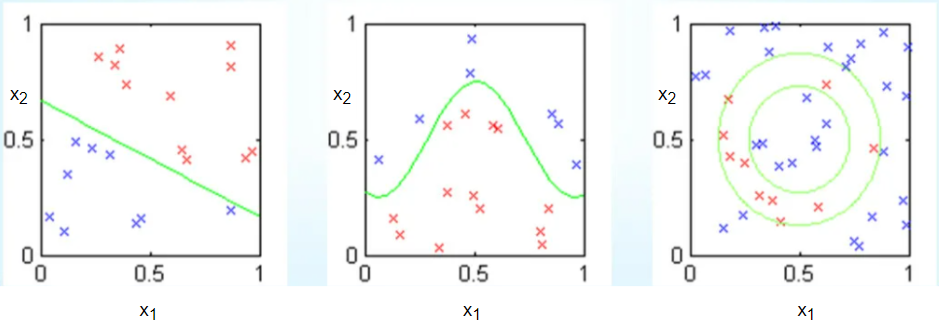

>Модели, которые решают задачу классификации, называются **классификаторами (classifier)**.

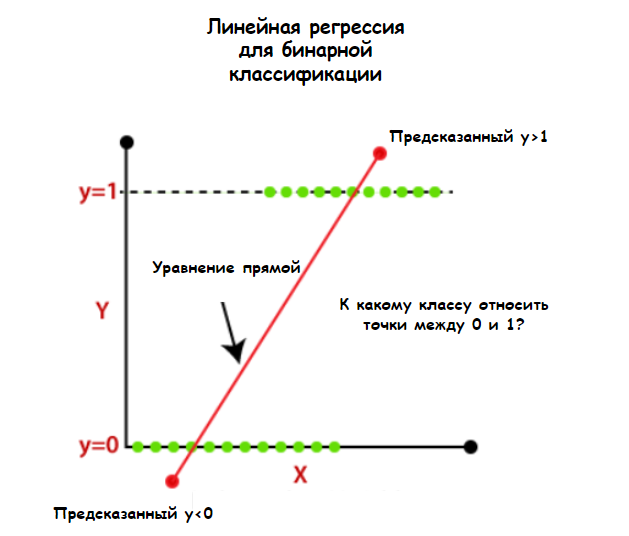

>**Логистическая регрессия (Logistic Regression)** — одна из простейших моделей для решения задачи классификации. Несмотря на простоту, модель входит в топ часто используемых алгоритмов классификации в Data Science.

В основе логистической регрессии лежит логистическая функция (logistic function) $\sigma(z)$ — отсюда и название модели. Однако более распространённое название этой функции — **сигмόида (sigmoid)**. Записывается она следующим образом:

$$ \sigma (z) = \frac{1}{1+e^{-z}} $$

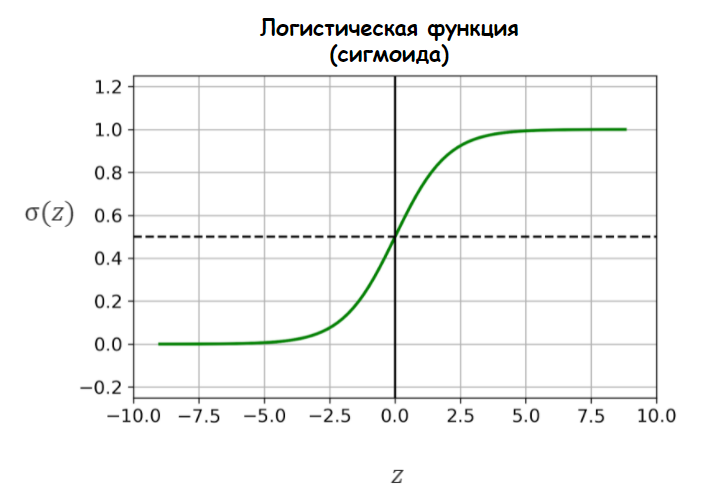

У сигмоиды есть два очень важных для нас свойства:
* Значения сигмоиды  лежат в диапазоне от 0 до 1 при любых значения аргумента $z$: какой бы $z$ вы ни подставили, число меньше 0 или больше 1 вы не получите.
* Сигмоида выдаёт значения $\sigma(z) > 0.5$ при её аргументе $z>0$, $\sigma(z)<0.5$ — при $z<0$ и $\sigma(z)=0.5$ — при $z=0$.

Основная идея модели логистической регрессии:

$$ z = w_0 + \sum^m_{j=1}w_jx_j $$
$$ \widehat{P} = \sigma(z) = \frac{1}{1+e^{-z}} = \frac{1}{1+e^{-w_0 + \sum^m_{j=1}w_jx_j}} = \frac{1}{1+e^{-\overline{w}\cdot\overline{x}}} $$

Если ***оценочная вероятность*** $\widehat{P} > 0.5$ - относим объект к классу $1$. $\widehat{P} \leq 0.5$ - к классу $0$. Математически записывается следующей формулой:

$$ \widehat{y} = I[\widehat{P}] = \begin{cases} 1,\widehat{P} > 0.5 \\ 0,\widehat{P} \leq 0.5 \end{cases} $$

>В данном выражении $I[\widehat{P}]$ называется **индикаторной функцией**. Она возвращает 1, если её значение больше какого-то порога, и 0 — в противном случае. Математики часто записывают просто квадратные скобки, опуская символ $I$: $[\widehat{P}]$.

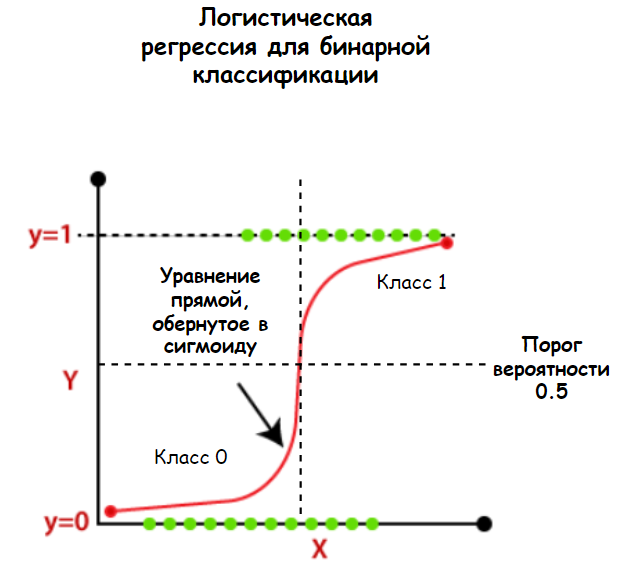

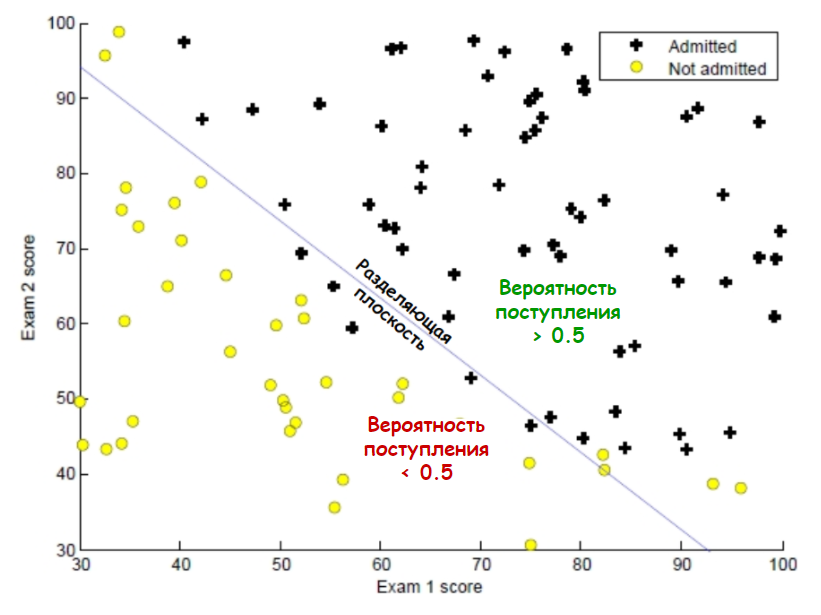

>Таким образом, ключевым моментом в предсказании логистической регрессии является расстояние от точки до разделяющей плоскости в пространстве факторов. Это расстояние в литературе часто называется **отступом (margin)**

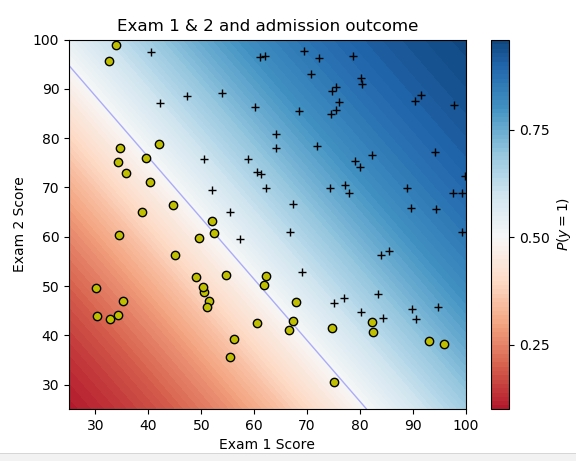

3D-случай:

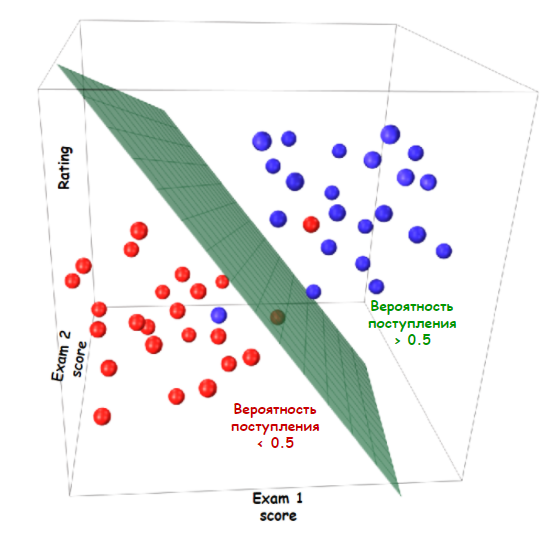

В общем случае, когда у нас есть зависимость от  факторов, линейное выражение, находящееся под сигмоидой, будет обозначать **разделяющую гиперплоскость**.
$$ z = w_0 + w_1x_1 + w_2x_2 + \dots + w_mx_m = w_0 + \sum^m_{j=1}w_jx_j $$


# <center>Поиск параметров логистической регрессии</center>
## Метод максимального правдоподобия (Maximum Likelihood Estimation — MLE)
>**Правдоподобие** — это оценка того, насколько вероятно получить истинное значение целевой переменной $y$ при данных $x$ и параметрах $w$. 

Цель метода — найти такие параметры $ w=(w_0, w_1, w_2, \dots, w_m) $, в которых наблюдается максимум функции правдоподобия.

$$ likelihood = \sum^n_i (y_i\log(\widehat{P}_i) + (1-y_i)\log(1-\widehat{P}_i)) \to \max_w $$

* $n$ - количество наблюдений.
* $y_i$ - это истинный класс (1 или 0) для $i$-ого объекта из набора данных.
* $\widehat{P}_i = \sigma(z_i)$ - предсказанная с помощью логистической регрессии вероятность принадлежности к классу 1 для $i$-ого объекта из набора данных.
* $z_i$ - результат подстановки $i$-ого объекта из набора данных в уравнение разделяющей плоскости $z_i = \overline{w}\cdot\overline{x}_i$.
* $\log$ - логарифм (обычно используется натуральный логарифм по основанию $e - \ln$).

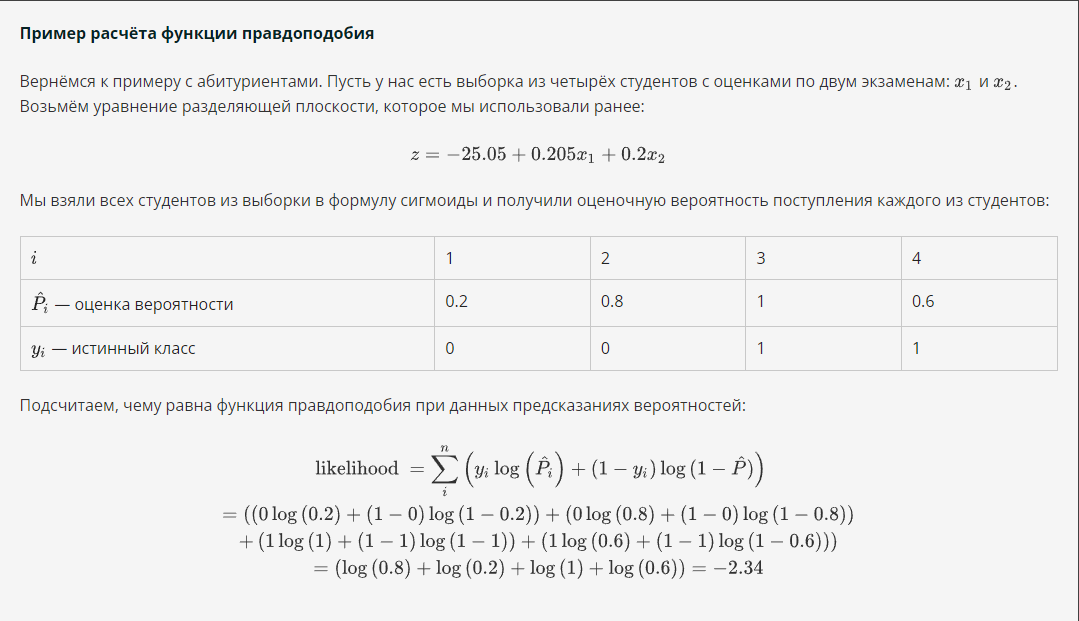

Цель — найти такие параметры, при которых наблюдается максимум этой функции.

Если поставить минус перед функцией, то поиск максимума превратится в поиск минимума.

**logloss(функция логистических потерь, кросс-энтропия, cross-entropy loss):**

$$ L(w) = logloss = \sum^n_i (y_i\log(\widehat{P}_i) + (1-y_i)\log(1-\widehat{P}_i)) \to \min_w $$
$$ \widehat{P}_i = \frac{1}{1 + e^{-w_0-\sum^m_{j=1}w_jx_j}} $$

Вот эту функцию мы и будем минимизировать в рамках поиска параметров логистической регрессии. Мы должны найти такие параметры разделяющей плоскости  $w$, при которых наблюдается минимум $logloss$.
Для такой функции потерь аналитическое решение не существует.

Формула градиентного спуска для $logloss$:

$$ L(w) = - \sum^n_i(y_i\log(\sigma(wx_i)) + (1-y_i)\log(1-\sigma(wx_i))) $$
$$ \nabla L(w) = -\sum^n_ix_i(y_i - \sigma(wx_i)) $$
$$ w^{k+1} = w^{(k)} - \eta \nabla L\big(w^{(k)}\big) = w^{(k)} + \eta \sum^n_ix_i\big(y_i-\sigma(w^{(k)}x_i)\big) $$

Во избежание переобучения модели в функцию потерь логистической регрессии традиционно добавляется **регуляризация**. В реализации логистической регрессии в sklearn она немного отличается от той, что мы видели ранее для линейной регрессии.

При L1-регуляризации мы добавляем в функцию потерь $L(w)$ штраф из суммы модулей параметров, а саму функцию $logloss$ умножаем на коэффициент $C$:

$$ L(w) = C \cdot logloss + \sum^m_{j=1}|w_j| \to \min_w $$

А при L2-регуляризации — штраф из суммы квадратов параметров:

$$ L(w) = C \cdot logloss + \sum^m_{j=1}(w_j)^2 \to \min_w $$

$С$ — коэффициент, обратный коэффициенту регуляризации $\alpha$. Чем **больше** $C$, тем **меньше** «сила» регуляризации.

![](https://lms.skillfactory.ru/assets/courseware/v1/bfdf530906dbc60202d51e4233e10185/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml3-2_12.gif)
![](https://lms.skillfactory.ru/assets/courseware/v1/dd3061bf76c343ce85ae577b688d7be9/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml3-2_13.gif)
![](https://lms.skillfactory.ru/assets/courseware/v1/a8a14407d575891d483ae85fc714243f/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml3-2_14.gif)